# Forecasting the COVID-19 Virus Spread

## This second notebook will focus on using the data transformed from the first notebook and forecasting the spread of the Coronavirus

First of all, let's import the processed data from the first notebook. From there I would like to try out different models to see which way we can predict the spread the best possible way.

### Raw Data Sources
Taken from the John Hopkins University Github: https://github.com/CSSEGISandData/COVID-19

### Changes
* 24-03-2020: Start of project

In [40]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels
plt.style.use('seaborn-colorblind')
%matplotlib inline 

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dylanye/Kaggle-COVID19-EIM-Functions/master/data/02_processed/covid_19_clean_complete.csv', parse_dates=['Date'])

In [8]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
19215,NaN,Jersey,49.1900,-2.110,2020-03-23,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.500,2020-03-23,0.0,1.0,0.0
19217,NaN,Republic of the Congo,-1.4400,15.556,2020-03-23,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.000,2020-03-23,0.0,0.0,0.0
19219,NaN,The Gambia,13.4667,-16.600,2020-03-23,0.0,0.0,0.0


In [9]:
df.rename(columns={'ObservationDate': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Last Update':'last_updated',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

# cases 
cases = ['confirmed', 'deaths', 'recovered', 'active']

# Active Case = confirmed - deaths - recovered
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

# replacing Mainland China with just China
df['country'] = df['country'].replace('Mainland China', 'China')

# filling missing values 
df[['state']] = df[['state']].fillna('')
df[cases] = df[cases].fillna(0)
df.rename(columns={'Date':'date'}, inplace=True)

In [105]:
df.head()

,state,country,Lat,Long,date,confirmed,deaths,recovered,active
0,,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [106]:
print("External Data")
print(f"Earliest Entry: {df['date'].min()}")
print(f"Last Entry:     {df['date'].max()}")
print(f"Total Days:     {df['date'].max() - df['date'].min()}")

External Data
Earliest Entry: 2020-01-22 00:00:00
Last Entry:     2020-03-23 00:00:00
Total Days:     61 days 00:00:00


In [107]:
country = df.groupby(['date', 'country'])['date', 'confirmed', 'deaths','recovered','active'].sum().reset_index()

<ipython-input-107-3e00ca80a653>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  country = df.groupby(['date', 'country'])['date', 'confirmed', 'deaths','recovered','active'].sum().reset_index()


In [108]:
country = country.set_index('date')

In [109]:
country

,country,confirmed,deaths,recovered,active
date,,,,,
2020-01-22,Afghanistan,0.0,0.0,0.0,0.0
2020-01-22,Albania,0.0,0.0,0.0,0.0
2020-01-22,Algeria,0.0,0.0,0.0,0.0
2020-01-22,Andorra,0.0,0.0,0.0,0.0
2020-01-22,Angola,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-03-23,Uzbekistan,43.0,0.0,0.0,43.0
2020-03-23,Venezuela,70.0,0.0,15.0,55.0
2020-03-23,Vietnam,113.0,0.0,17.0,96.0


In [117]:
europe = list(['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland',
               'Italy', 'Latvia','Luxembourg','Lithuania','Malta','Norway','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia',
               'Spain', 'Sweden', 'United Kingdom', 'Iceland', 'Russia', 'Switzerland', 'Serbia', 'Ukraine', 'Belarus',
               'Albania', 'Bosnia and Herzegovina', 'Kosovo', 'Moldova', 'Montenegro', 'North Macedonia'])

In [118]:
europe = df[df['country'].isin(europe)]

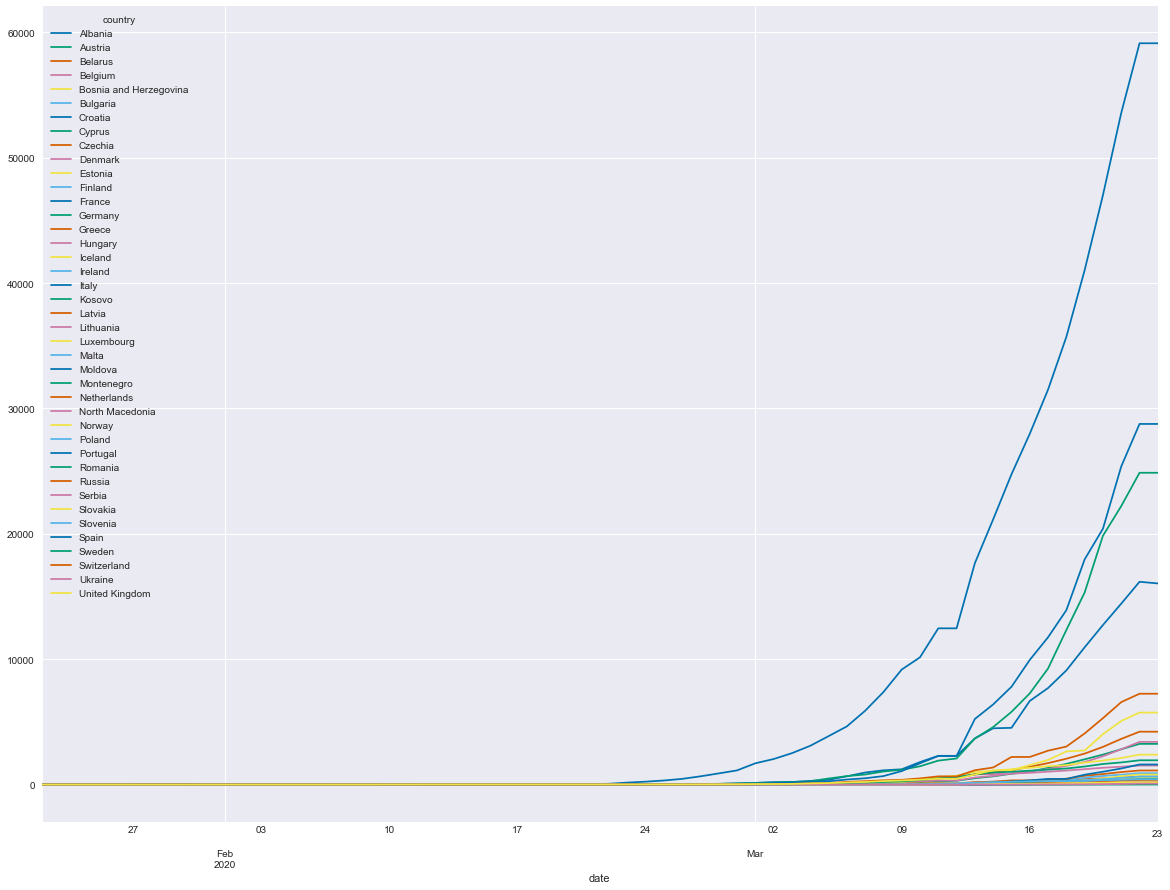

In [119]:
europe.groupby(['date', 'country']).sum()['confirmed'].unstack().plot(figsize=(20,15))

In [120]:
total = df.groupby('date')['date', 'confirmed', 'deaths'].sum().reset_index()

<ipython-input-120-b5269178f084>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total = df.groupby('date')['date', 'confirmed', 'deaths'].sum().reset_index()


In [121]:
total

,date,confirmed,deaths
0,2020-01-22,554.0,17.0
1,2020-01-23,652.0,18.0
2,2020-01-24,939.0,26.0
3,2020-01-25,1432.0,42.0
4,2020-01-26,2113.0,56.0
...,...,...,...
57,2020-03-19,242708.0,9867.0
58,2020-03-20,272166.0,11299.0
59,2020-03-21,304524.0,12973.0
60,2020-03-22,335955.0,14632.0
